In [6]:
# block_path = '/mnt/cube/ephys-example-data/Pen01_Lft_AP2500_ML1350__Site10_Z2026__B997_cat_P01_S10_Epc10/'
# block_path = '/mnt/cube/ephys-example-data/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'
# block_path = '/mnt/cube/ephys-example-data/Pen04_Lft_AP2555_ML500__Site02_Z2688__st979_cat_P04_S02_1/'
block_path ='/home/brad/cube/Ice/kperks/B1087/klusta/phy040516/Pen03_Lft_AP0_ML500__Site04_Z3100__B1087_cat_P03_S04_1//'

First, let's load the clusters.

In [2]:
from ephys import core

In [9]:
clusters = core.load_clusters(block_path)
print clusters.head()

   cluster   quality
0        0  unsorted
1        2      Good
2        3      Good
3        4      Good
4        5      Good


Let's check the distribution of cluster values.

In [10]:
clusters.quality.value_counts()

Good        75
unsorted     8
MUA          1
Name: quality, dtype: int64

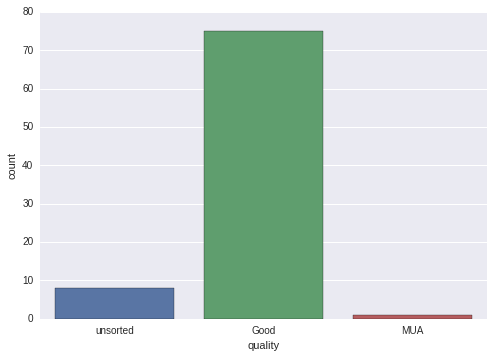

In [12]:
%matplotlib inline
import seaborn as sns

sns.countplot('quality',data=clusters)

Sweet! Let's get a new dataframe without the noise or unsorted clusters

In [13]:
neurons = (
    clusters[clusters.quality.isin(['Good','MUA'])]
    .sort_values(['quality','cluster'])
    .reset_index()
)
print neurons.quality.unique()


['Good' 'MUA']


Nice! Now, let's compute some metrics.

In [14]:
from ephys import clust

neurons['width'] = neurons['cluster'].map(
    lambda clu: clust.get_width(block_path,clu)
)

print neurons.head()

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


   index  cluster quality     width
0      1        2    Good  0.000408
1      2        3    Good  0.000393
2      3        4    Good  0.000419
3      4        5    Good  0.000406
4      5        6    Good  0.000325


In [23]:
len(neurons['width'].values)

76

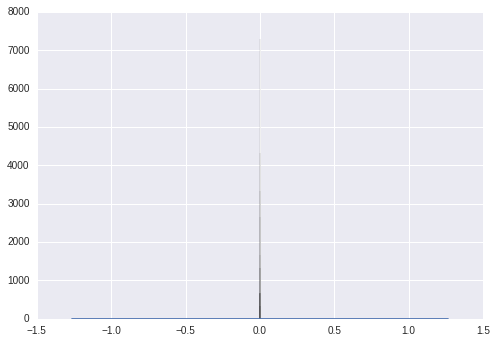

In [26]:
import numpy as np
sns.distplot(np.squeeze(neurons['width'].values))

In [19]:
neurons['x_probe'] = neurons['cluster'].map(
    lambda clu: clust.get_cluster_coords(block_path,clu,weight_func=clust.mean_masks_w)[0]
)
neurons['y_probe'] = neurons['cluster'].map(
    lambda clu: clust.get_cluster_coords(block_path,clu,weight_func=clust.mean_masks_w)[1]
)

(-5.0, 35.0, -50.0, 300.0)

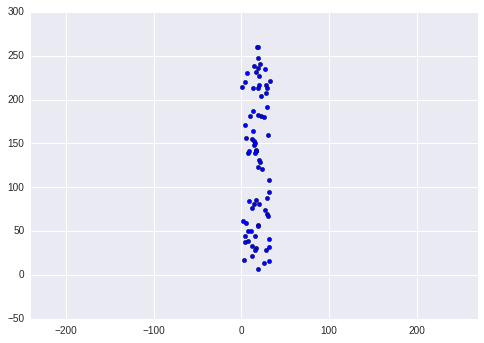

In [20]:
import matplotlib.pyplot as plt
plt.scatter(neurons['x_probe'],neurons['y_probe'])
plt.axis('equal')

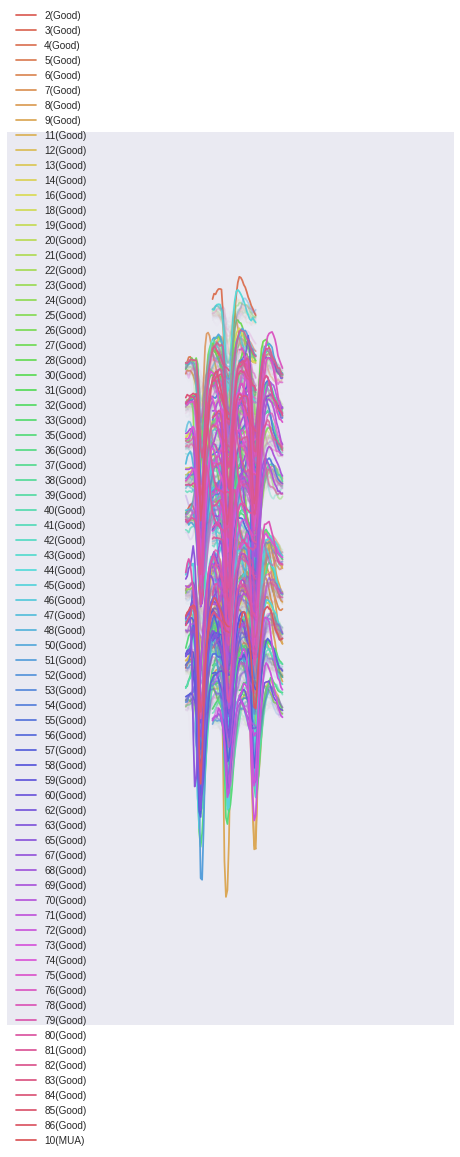

In [27]:
from ephys import viz
f,ax = plt.subplots(1,1,figsize=(8,16))
viz.plot_all_clusters(block_path,neurons,scale_factor=0.025)

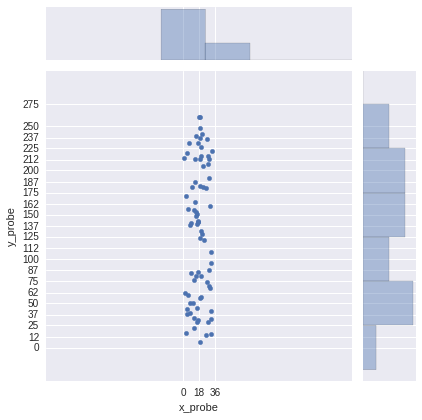

In [22]:
viz.plot_cluster_locations(block_path)

In [18]:
sns.set_style('white')